# Libs

In [1]:
import pandas as pd
import numpy as np
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model, load_model
from keras.layers import Input, LSTM, Dense, Masking
import matplotlib
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
from keras_metrics import KerasMetrics
from keras.optimizers import adam
import keras.backend as K
from sklearn.metrics import f1_score
from scipy.spatial import distance
import pickle
import lib
%load_ext autoreload
%autoreload 2
opt = adam()

Using TensorFlow backend.


# Data

In [2]:
corpus = pd.read_csv("Corpus_new_coding/403_verbs_with_classes.csv",index_col="Unnamed: 0")

In [82]:
corpus.groupby('class').count().iloc[:,0]

class
class__ansiar       9
class__botar       30
class__cobrir       7
class__dizer        7
class__fazer       15
class__ler          5
class__mentir       8
class__pedir        7
class__por         27
class__regular    214
class__seguir      27
class__ter         10
class__testar      20
class__ver          6
class__vir         11
Name: v_inf, dtype: int64

In [81]:
corpus.groupby('class').count().apply(lambda g: g / g.sum()).iloc[:,0]

class
class__ansiar     0.022333
class__botar      0.074442
class__cobrir     0.017370
class__dizer      0.017370
class__fazer      0.037221
class__ler        0.012407
class__mentir     0.019851
class__pedir      0.017370
class__por        0.066998
class__regular    0.531017
class__seguir     0.066998
class__ter        0.024814
class__testar     0.049628
class__ver        0.014888
class__vir        0.027295
Name: v_inf, dtype: float64

# Features

In [4]:
features = lib.features()

In [5]:
#http://www.ipachart.com/
with open('Files/phones.pickle', 'rb') as file:
    phones = pickle.load(file)

about pre padding: https://stackoverflow.com/questions/46298793/how-does-choosing-between-pre-and-post-zero-padding-of-sequences-impact-results

# Training

In [29]:
model, decode_from_df, history = lib.train(corpus, epochs=300)

In [30]:
model, decode_from_df_big, history_big = lib.train(corpus, epochs=2000)

# Results: F1 Plot, Precision, Recall Plot

## 300 Epochs

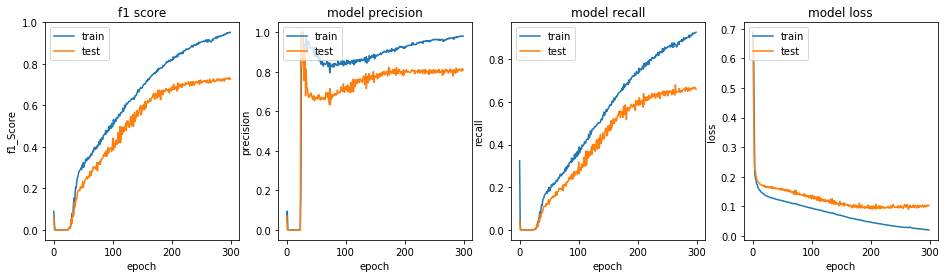

In [32]:
lib.plot_results(history)

In [33]:
history.history['val_fbeta_score'][-1]

0.725723922252655

In [34]:
history.history['val_recall'][-1]

0.6584234833717346

In [35]:
history.history['val_precision'][-1]

0.8083491325378418

## 2000 Epochs

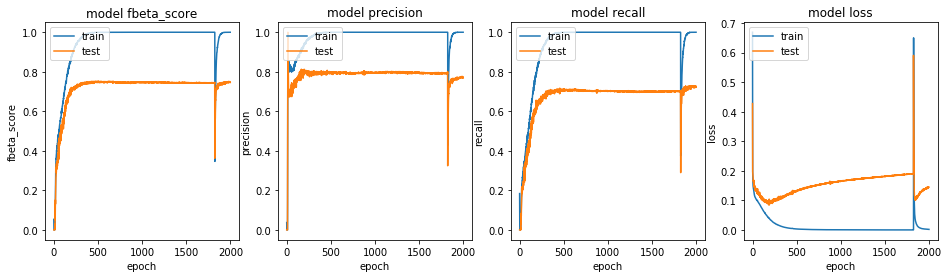

In [94]:
lib.plot_results(history_big)

# KFold Analysis

In [99]:
all_decodings = lib.kfold(corpus, n=5)

(317, 3) (86, 3)
(319, 3) (84, 3)
(324, 3) (79, 3)
(325, 3) (78, 3)
(327, 3) (76, 3)


In [100]:
all_decodings

,infinitive,predicted,target,class
0,preve,prezu,preveju,class__ver
1,Anteve,Anensi,Anteveju,class__ver
2,3ntrete,3ntentru,3ntret3Nu,class__ter
3,obite,$ebitu,obit3Nu,class__ter
4,deskobri,deskottu,deskubru,class__cobrir
5,hekobri,hekOttu,hekubru,class__cobrir
6,persegi,pretitu,persigu,class__seguir
7,espeli,espe,espilu,class__seguir
8,vesti,vEzu,vistu,class__seguir
9,inseri,insiru,insiru,class__seguir


In [103]:
all_decodings.to_csv("Files/all_decodings", index=None)

# Learning Curve x Train Size

In [30]:
lc = {}
for length in [100, 150, 250, 300, 393]:
    history = train(length)
    lc[length] = history.history['val_fbeta_score'][-1], history.history['recall'][-1], history.history['precision'][-1]

CPU times: user 35min 18s, sys: 3min 47s, total: 39min 5s
Wall time: 11min 20s


In [31]:
lc

{100: (0.5534803867340088, 0.6876574158668518, 0.9181614518165588),
 150: (0.5637180805206299, 0.7294632792472839, 0.9192546606063843),
 250: (0.7961629629135132, 0.8921688175201417, 0.9658581089973449),
 300: (0.7927590012550354, 0.9350285490353902, 0.9777678648630778),
 393: (0.7852533459663391, 0.9763083427574983, 0.9875784125297692)}

with open('WickelfeaturesProject/Files/learning_curve.pickle', 'wb') as file:
    pickle.dump(lc, file, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('WickelfeaturesProject/Files/lc.pickle', 'rb') as file:
    lc = pickle.load(file)